In [1]:
import xml.etree.ElementTree as et
import pickle
import collections
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

In [2]:
picklename=[1,2,3,4,5,6]
filename=["00-04","04-08","08-12","12-16","16-20","20-00"]

In [3]:
data=OrderedDict()
fname="00-04"
#for fname,alias in zip(filename,picklename):
data=OrderedDict()
tree=et.parse("Data/"+fname+".xml")
root=tree.findall("host")

for host in root:
    portnode=host.findall("ports/port")
    ipv4=host.find(".//address[@addrtype='ipv4']").get("addr")
    if portnode !=None:
        for ports in portnode:
            portid,proto=ports.get("portid"),ports.get("protocol")
            if int(portid) <= 1200:
                #print(ipv4,portid, proto)
                servicenode=ports.find("service")
                #print(servicenode.get("name"))
                key=servicenode.get("name")
                if key not in data:
                    data[key]=[0,0]
                data[key][0]+=1
                data[key][1]=portid

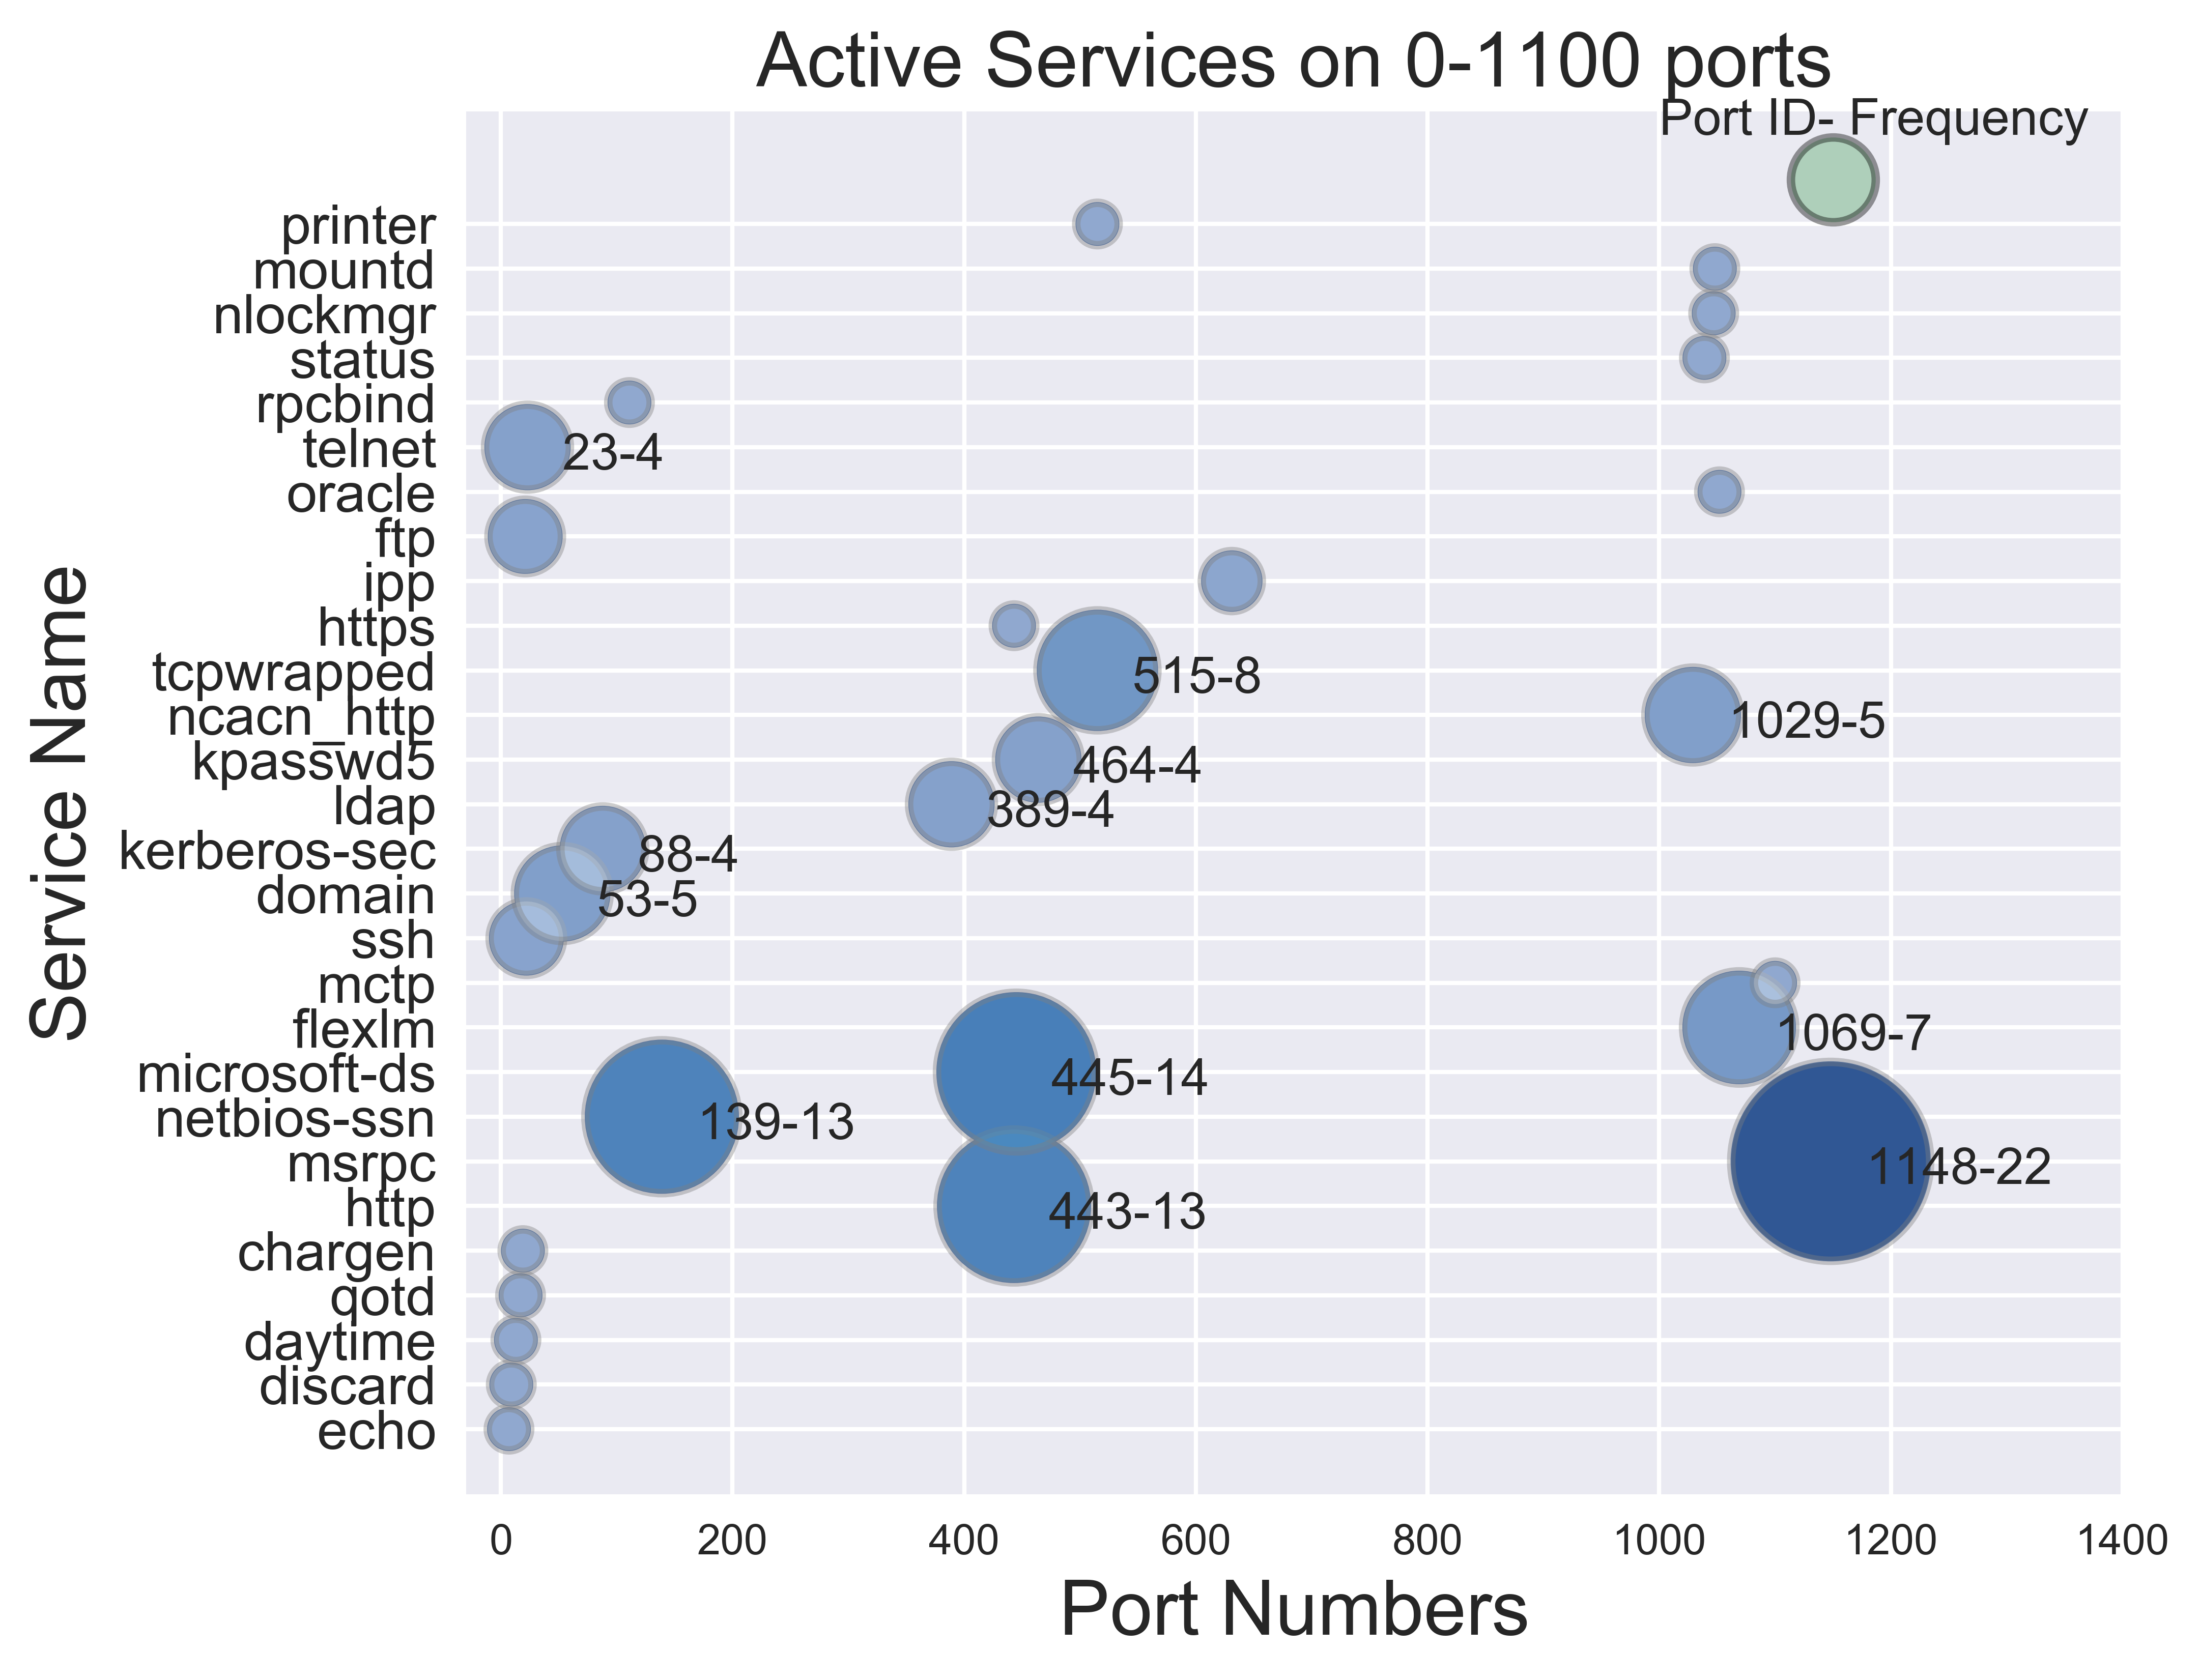

In [10]:
data
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.plotly as py
sns.set()
plt.close()
#plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize=(7,6),dpi=600)
#bubbles_mpl = plt.figure()
y=[i for i in range(len(data))]
x=[int(data[i][1]) for i in data]
s=[data[i][0]*100 for i in data]
# doubling the width of markers
#x = [0,2,4,6,8,10]
#y = [0]*len(x)
#s = [20*4**n for n in range(len(x))]
#plt.rcParams.update({'font.size': 16})
plt.scatter(x,y,s=s)
plt.scatter(x, y, s=s, c=s, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
plt.scatter(1200-50, 28, s=400, cmap="Blacks", alpha=0.4, edgecolors="black", linewidth=2)
ax.annotate("Port ID- Frequency",(1200-200,29))

plt.yticks(y,[i for i in data],size=13)

for i, txt in data.items():
    if txt[0]>3:
        ax.annotate(txt[1]+"-"+str(txt[0]), (int(txt[1])+30,datamap[i]-0.5))
    
x.sort()
plt.xlim(-30,1400)
plt.title("Active Services on 0-1100 ports",size=18)
plt.ylabel("Service Name",size=18)
plt.xlabel("Port Numbers",size=18)
plt.show()

In [15]:
import plotly
plotly.tools.set_credentials_file(username='harshitgujral12', api_key='sYMxLktU6P9LIIHD66hc')

In [5]:
datamap={}
for i,j in zip(data,range(len(data))):
    datamap[i]=j

In [129]:
max(x)

49161